In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as dates
import obspy
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import event_detector_pipeline as edp

hydrophone_metadata = {
    'h1':{
        # start and end identifies the start time of the swarm where the amplitude magnitude is the highest
        'start':obspy.UTCDateTime('2019-05-21T07:35:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T07:48:00Z')
       # obspy_idx is the index within the stream for this data (all data is sorted from top to bottom of the borehole this way in lists)
        ,'obspy_idx':0
        # depth of the hydrophone
        ,'depth':30
        ,'velocity_model':1750
    }
    ,    'h2':{
        'start':obspy.UTCDateTime('2019-05-21T07:35:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T07:48:00Z')
        ,'obspy_idx':1
        ,'depth':100        
        ,'velocity_model':1750

    }
    ,    'h3':{
        'start':obspy.UTCDateTime('2019-05-21T07:35:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T07:48:00Z')
        ,'obspy_idx':2
        ,'depth':170        
        ,'velocity_model':1750

    }
    ,'h4':{
        'start':obspy.UTCDateTime('2019-05-21T07:48:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:07:00Z')
        ,'obspy_idx':3
        ,'depth':240
        ,'velocity_model':1750
    }
    ,'h5':{
        'start':obspy.UTCDateTime('2019-05-21T08:07:00Z')
        # ,'end':obspy.UTCDateTime('2019-5-21T08:34:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:38:00Z')
        ,'obspy_idx':4
        ,'depth':310
        ,'velocity_model':1750
    }
    ,'h6':{
        'start':obspy.UTCDateTime('2019-05-21T08:34:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:38:00Z')
       ,'obspy_idx':5
        ,'depth':380
        ,'velocity_model':1750
    }
}

In [2]:
df = pd.read_csv('precision.csv')

In [3]:
paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=141)
waveforms = load.import_corrected_data_for_single_day(paths=paths)
swarm_starttime = obspy.UTCDateTime('2019-05-21T07:30:00')
swarm_endtime = obspy.UTCDateTime('2019-05-21T08:38:30')
waveforms = waveforms.trim(starttime=swarm_starttime, endtime=swarm_endtime)

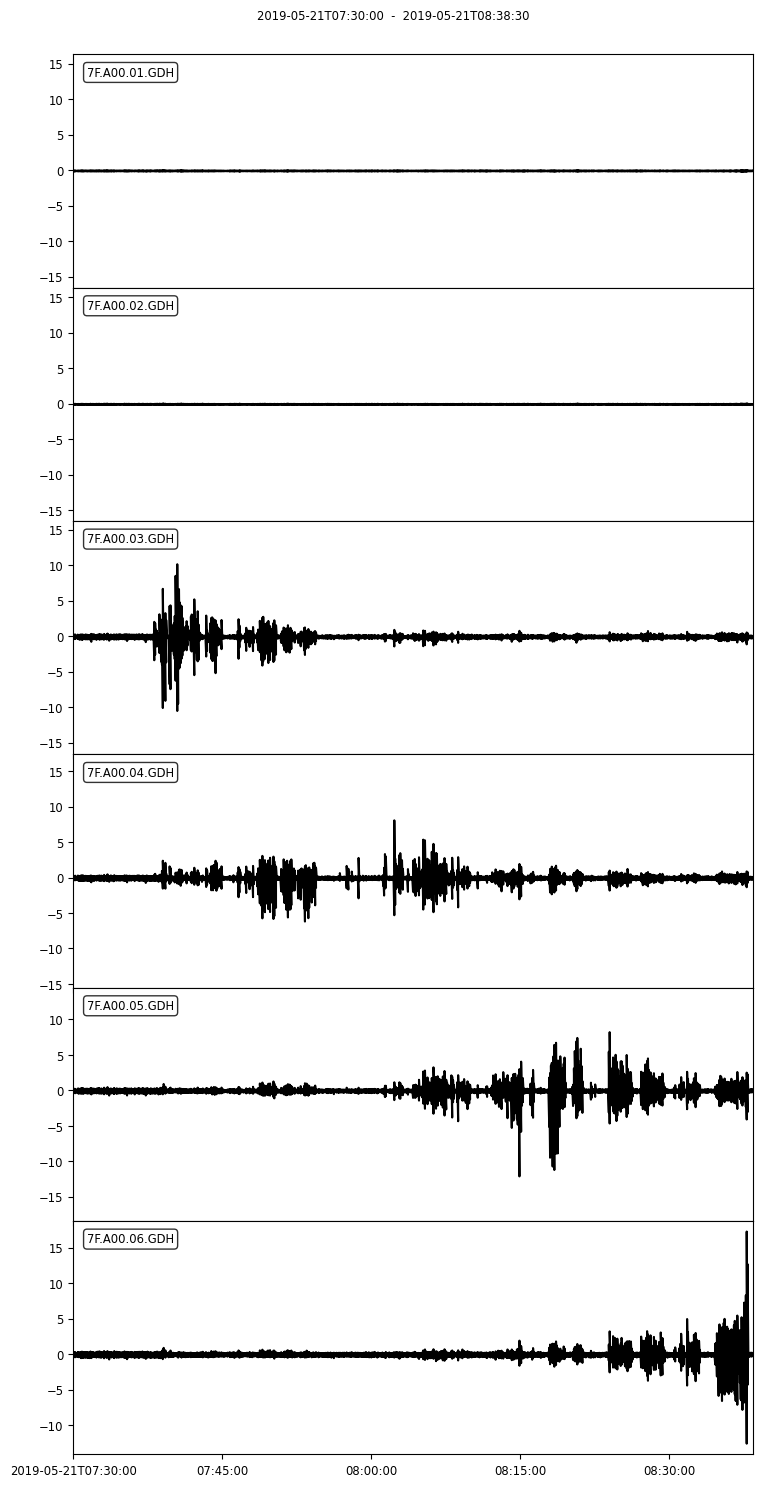

In [4]:
# x = waveforms.plot()


In [5]:
# waveforms.filter(type='highpass', freq=100, zerophase=False, corners=1)

In [6]:
# x = waveforms.plot()

TypeError: 'AxesSubplot' object is not subscriptable

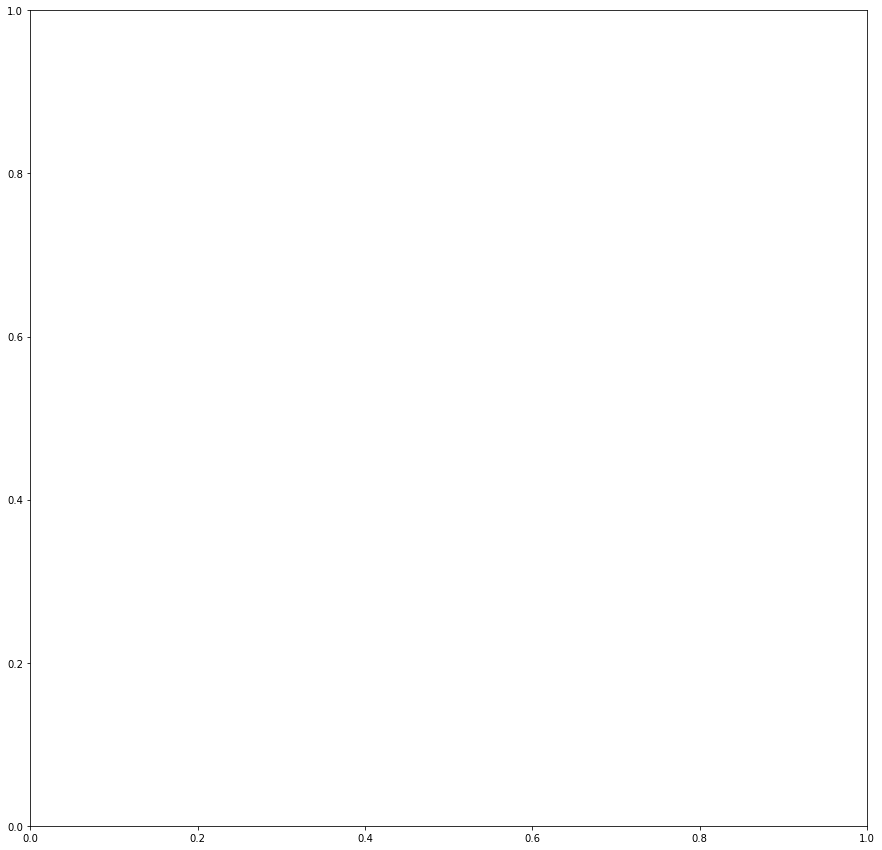

In [16]:
event = df.iloc[750]
starttime = obspy.UTCDateTime(pd.to_datetime(event.first_arrival))

window_start = starttime - 1
window_end = starttime + 1

window = waveforms.copy().trim(starttime=window_start, endtime=window_end)
raw = window.copy()
window.filter(type='highpass', freq=100, zerophase=False, corners=1)

# fig, ax = plt.subplots(4, 1, figsize=(15, 15), sharey=True, sharex=True)
fig, ax = plt.subplots(figsize=(15, 15), sharey=True, sharex=True)

for n, tr in enumerate(raw[3:]):
    ax[n].plot(tr.times('matplotlib'), tr.data, color='black', linewidth=0.5)
    break

for n, tr in enumerate(window[3:]):
    ax[n].plot(tr.times('matplotlib'), tr.data, color='red', linewidth=0.5)
    break
    
fig.tight_layout()